Nick can't have *all* the fun. Time to do some statistics on mailing list activity.

First, let's do some imports...

In [1]:
%matplotlib inline

In [56]:
import bigbang.mailman as mailman
import bigbang.graph as graph
import bigbang.process as process
from bigbang.parse import get_date
#from bigbang.functions import *
from bigbang.archive import Archive

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
plt.rcParams['axes.facecolor'] = 'white'
import seaborn as sns
sns.set()
sns.set_style("white")

In [6]:
arx = Archive('geopriv',mbox=True)
acts = arx.get_activity(resolved=False)

169
Opening 169 archive files
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
[[ Jue, 25 May 2006 04:41:54 p.m. ]]
Date parsing error on: 
[[ Jue, 25 May 2006 08:26:21 p.m. ]]
Date parsing error on: 
[[ Vie, 26 May 2006 04:26:53 p.m. ]]
Date parsing error on: 
[[ Lun, 29 May 2006 04:48:44 p.m. ]]
Date parsing error on: 
[[ Mi, 31 May 2006 02:01:29 p.m. ]]
Date parsing error on: 
[[ Mi, 31 May 2006 01:17:35 p.m. ]]
Date parsing error on: 
, 19     2007 09:29:35 +0200
Date parsing error on: 
, 19     2007 09:28:12 +0200
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
Tue, 0 Jan 2008 17:59:50 +0100
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsing error on: 
None
Date parsi

A hack: `idxmax` gets the index first row with the maximum value of a column. If we first compare with `> 0`, then this gives us the index of the first positive value. That's the date of the first post.

In [11]:
first_messages = acts.applymap(lambda x: x > 0).idxmax()

Because we're curious, let's get the number of messages sent by each person in the first 30 days of their participation on the mailing list.

In [29]:
def messages_in_first_30_days(name,date):
    loc_1 = acts.index.get_loc(date)
    return acts[name].iloc[loc_1:loc_1+30].sum()

first_30 = pd.Series({name: messages_in_first_30_days(name,date) for name,date in first_messages.items()})

Now here is the total of all messages sent by the person.

In [30]:
total = acts.sum(axis=0)

In [66]:
data = pd.DataFrame()
data['first_30'] = first_30
data['total'] = total

We want to know the extent to which the first 30 days are predictive of a participant's total messages. But we can't just take this regression! Currently, the first 30 days are tallied into the total, which biases the result. Let's remove the first 30 day count from the total.

In [67]:
data['future'] = data['total'] - data['first_30']

This data is going to be very skewed towards low values, making it hard to understand the data visually...

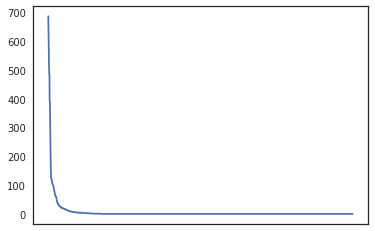

In [68]:
data['future'].sort_values(ascending=False).plot()

So let's take the log of the values (or really, log of 1 + the data, to take care of values of 0).

In [69]:
log_data = data.applymap(np.log1p)

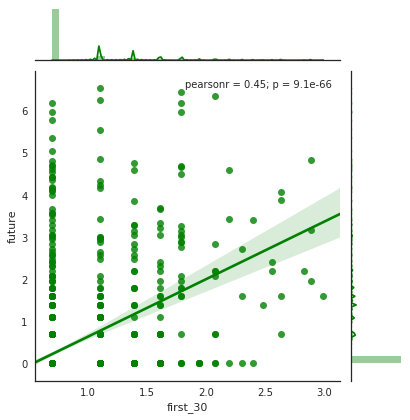

In [70]:
sns.jointplot(x="first_30", y="future", data=log_data, kind="reg", color='g');

Looks like indeed, posting frequency in the first 30 days is predictive of more posts throughout ones career. CHeck out that 